In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.notebook
from IPython.display import set_matplotlib_formats
from loaders import load_selected_attributes, load_thumbnail

tqdm.notebook.tqdm().pandas()

%matplotlib inline
set_matplotlib_formats('svg')
sns.set(rc={'axes.labelcolor':'black'})

/usr/local/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [7]:
vids = load_selected_attributes()
vids

,category_id,description__ant,description__avail,description__deal,description__follow,description__game,description__imag,description__key,description__life,description__music,...,title__shoot,title__tech,title__trailer,title__video,title__world,title_num_exclamation_marks,title_num_numbers,title_num_periods,title_num_question_marks,title_num_uppercase_words
0,NaN,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,NaN,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8603,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4
8604,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8605,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
vids['category_id'].isnull().value_counts()

True     8212
False     395
Name: category_id, dtype: int64

category labeled: 395
not labeled: 8212
labeled to not labeled ratio 4.59 %

Category per labeled video:


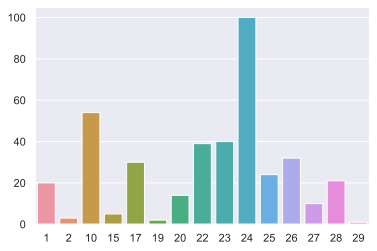

In [9]:
all_vids = vids
labeled_vids = vids[~pd.isnull(vids['category_id'])]

labeled_count = len(labeled_vids.index)
notlabeled_count = len(all_vids.index) - len(labeled_vids.index)

print('category labeled:', labeled_count)
print('not labeled:', notlabeled_count)
print('labeled to not labeled ratio', round(labeled_count / len(vids.index) * 100, 2), '%')
print()
print('Category per labeled video:')

count = labeled_vids['category_id'].value_counts()
sns.barplot(count.index.astype('int'), count.values)

# Label Spreading

In [121]:
all_vids['has_image'] = all_vids['has_image'].astype(int)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("Null data before replacing:")
        print(all_vids.isnull().sum())
#     print(all_vids.loc[all_vids['description_num_chars']/.isnull()])
#     print(X_train_with_and_without_categories['like_ratio'])

X_train_with_and_without_categories = all_vids[all_vids.columns.difference(['category_id'], sort=False)].copy()
Y_train_with_and_without_categories = all_vids['category_id'].copy()

# Replace NaN for X data
# like_ratio == NaN if ratings are disabled. Using 1.0 instead.
X_train_with_and_without_categories['like_ratio'] = X_train_with_and_without_categories['like_ratio'].replace({np.nan: 1})
# description_num == NaN if there is no description. Using 0 instead.
X_train_with_and_without_categories = X_train_with_and_without_categories.replace({np.nan: 0})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("Count of null data after replacing:")
        print(X_train_with_and_without_categories.isnull().sum().sum())

# Replace NaN with -1.0 for Y data
print("Original Y values:")
print(Y_train_with_and_without_categories.value_counts(dropna=False))
Y_train_with_and_without_categories = Y_train_with_and_without_categories.replace({np.nan: -1})
Y_train_with_and_without_categories.value_counts()


Null data before replacing:
category_id                          8212
description__ant                        0
description__avail                      0
description__deal                       0
description__follow                     0
description__game                       0
description__imag                       0
description__key                        0
description__life                       0
description__music                      0
description__new                        0
description__news                       0
description__nhttp                      0
description__noggin                     0
description__show                       0
description__tag                        0
description__time                       0
description__watch                      0
description__world                      0
description__youtub                     0
description_num_chars                 150
description_num_exclamation_marks     150
description_num_numbers               150
descri

-1.0     8212
 24.0     100
 10.0      54
 23.0      40
 22.0      39
 26.0      32
 17.0      30
 25.0      24
 28.0      21
 1.0       20
 20.0      14
 27.0      10
 15.0       5
 2.0        3
 19.0       2
 29.0       1
Name: category_id, dtype: int64

In [150]:
from sklearn.preprocessing import StandardScaler, normalize, scale, Normalizer

X = normalize(X_train_with_and_without_categories, norm='l1', axis=0, copy=True)
# I love Python
Y_train_with_and_without_categories = [int(float(x)) for x in Y_train_with_and_without_categories]
X

array([[0.00039, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.00216, 0.00015],
       [0.     , 0.00164, 0.     , ..., 0.00071, 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.00015],
       [0.00039, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.00039, 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

/usr/local/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


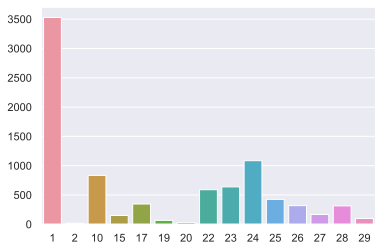

In [156]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

model = LabelSpreading('knn', gamma=.25, max_iter=100)
model.fit(X, Y_train_with_and_without_categories)

knn_predicted = model.predict(X)
count = pd.Series(knn_predicted).value_counts()
sns.barplot(count.index.astype('int'), count.values)


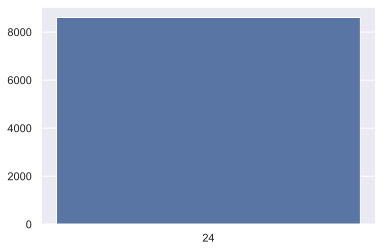

In [157]:
model = LabelSpreading('rbf', gamma=.25, max_iter=100)
model.fit(X, Y_train_with_and_without_categories)

rfb_predicted = model.predict(X)
count = pd.Series(rfb_predicted).value_counts()
sns.barplot(count.index.astype('int'), count.values)